### 1D 합성곱

In [1]:
import numpy as np

In [2]:
def conv1d(x,w,p=0,s=1):
    w_rot = np.array(w[::-1])
    x_padded = np.array(x)
    if p > 0:
        zero_pad = np.zeros(shape=p)
        x_padded = np.concatenate([zero_pad,x_padded,zero_pad])
    res =[]
    # 합성곱 출력 동작 
    for i in range(0,int(len(x)/s),s):
        res.append(np.sum(x_padded[i:i+w_rot.shape[0]] * w_rot))
    return np.array(res)

In [3]:
# 테스트
x = [1,3,2,4,5,6,1,3]
w = [1,0,3,1,2]
print('Conv1d : ', conv1d(x,w,p=2, s=1))
print('넘파이 결과 : ', np.convolve(x,w,mode='same'))

Conv1d :  [ 5. 14. 16. 26. 24. 34. 19. 22.]
넘파이 결과 :  [ 5 14 16 26 24 34 19 22]


### 2D 합성곱

In [4]:
import scipy.signal

In [9]:
def conv2d(x,w,p=(0,0),s=(1,1)):
    w_rot = np.array(w)[::-1, ::-1]
    x_orig = np.array(x)
    n1 = x_orig.shape[0] + 2*p[0]
    n2 = x_orig.shape[1] + 2*p[1]
    x_padded = np.zeros(shape=(n1,n2))
    x_padded[p[0]:p[0]+ x_orig.shape[0], p[1]:p[1]+ x_orig.shape[1]] = x_orig
    
    res =[]
    for i in range(0, int((x_padded.shape[0] -\
                          w_rot.shape[0])/s[0])+1, s[0]):
        res.append([])
        for j in range(0, int((x_padded.shape[1] -\
                              w_rot.shape[1])/s[1])+1, s[1]):
            x_sub = x_padded[i:i+w_rot.shape[0],
                             j:j+w_rot.shape[1]]
            res[-1].append(np.sum(x_sub * w_rot))
    return np.array(res)

In [10]:
x = [[1,3,2,4], [5,6,1,3], [1,2,0,2], [3,4,3,2]]
w = [[1,0,3],[1,2,1],[0,1,1]]
print('conv2d : \n', conv2d(x,w,p=(1,1), s=(1,1)))
print('scipy : \n', scipy.signal.convolve2d(x,w,mode='same'))

conv2d : 
 [[11. 25. 32. 13.]
 [19. 25. 24. 13.]
 [13. 28. 25. 17.]
 [11. 17. 14.  9.]]
scipy : 
 [[11 25 32 13]
 [19 25 24 13]
 [13 28 25 17]
 [11 17 14  9]]


### 다층 신경망

In [14]:
import tensorflow as tf

In [15]:
(x_data, y_data), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print('행: {}, 열: {}'.format(x_data.shape[0], x_data.shape[1]))
print('행: {}, 열: {}'.format(x_test.shape[0], x_test.shape[1]))
x_train, y_train = x_data[:50000,:], y_data[:50000]
x_valid, y_valid = x_data[50000:,:], y_data[50000:]
print('훈련 세트: ', x_train.shape, y_train.shape)
print('검증 세트: ', x_valid.shape, y_valid.shape)
print('테스트 세트: ', x_test.shape, y_test.shape)

11493376/11490434 [==============================] - 7s 1us/step
행: 60000, 열: 28
행: 10000, 열: 28
훈련 세트:  (50000, 28, 28) (50000,)
검증 세트:  (10000, 28, 28) (10000,)
테스트 세트:  (10000, 28, 28) (10000,)


In [16]:
mean_vals = np.mean(x_train, axis=0)
std_val = np.std(x_train)

x_train_centered = (x_train - mean_vals)/std_val
x_valid_centered = (x_valid - mean_vals)/std_val
x_test_centered = (x_test - mean_vals)/std_val

x_train_centered = x_train_centered.reshape((-1,28,28,1))
x_valid_centered = x_valid_centered.reshape((-1,28,28,1))
x_test_centered = x_test_centered.reshape((-1,28,28,1))

In [17]:
from tensorflow.keras.utils import to_categorical

In [18]:
y_train_onehot = to_categorical(y_train)
y_valid_onehot = to_categorical(y_valid)
y_test_onehot = to_categorical(y_test)

In [20]:
print('훈련세트: ', x_train_centered.shape, y_train_onehot.shape)
print('검증세트: ', x_valid_centered.shape, y_valid_onehot.shape)
print('훈련세트: ', x_test_centered.shape, y_test_onehot.shape)

훈련세트:  (50000, 28, 28, 1) (50000, 10)
검증세트:  (10000, 28, 28, 1) (10000, 10)
훈련세트:  (10000, 28, 28, 1) (10000, 10)


In [26]:
from tensorflow.keras import layers, models

In [29]:
model = models.Sequential()
model.add(layers.Conv2D(32,(5,5), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(5,5), padding='valid', activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [30]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])

In [31]:
# import time
# from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard

In [45]:
# callback_list = [ModelCheckpoint(filepath='cnn_checkpoint.h5',
#                                  monitor='val_loss',
#                                  save_best_only=True),
#                  TensorBoard(log_dir='logs' + '\{}'.format(time.asctime()))]

history = model.fit(x_train_centered, y_train_onehot,
                    batch_size=64, epochs=5,
                    validation_data=(x_valid_centered, y_valid_onehot))

Epoch 1/5
782/782 [==============================] - 37s 47ms/step - loss: 0.0077 - acc: 0.9977 - val_loss: 0.0755 - val_acc: 0.9880
Epoch 2/5
782/782 [==============================] - 41s 53ms/step - loss: 0.0106 - acc: 0.9968 - val_loss: 0.0489 - val_acc: 0.9912
Epoch 3/5
782/782 [==============================] - 36s 46ms/step - loss: 0.0078 - acc: 0.9976 - val_loss: 0.0466 - val_acc: 0.9920
Epoch 4/5
782/782 [==============================] - 37s 47ms/step - loss: 0.0099 - acc: 0.9968 - val_loss: 0.0460 - val_acc: 0.9922
Epoch 5/5
782/782 [==============================] - 34s 44ms/step - loss: 0.0055 - acc: 0.9985 - val_loss: 0.0428 - val_acc: 0.9917


In [46]:
import matplotlib.pyplot as plt

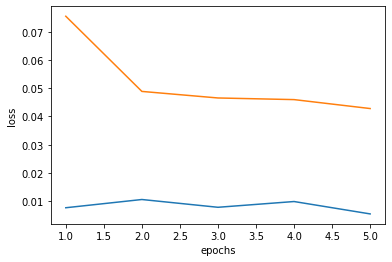

In [59]:
epochs = np.arange(1,6)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

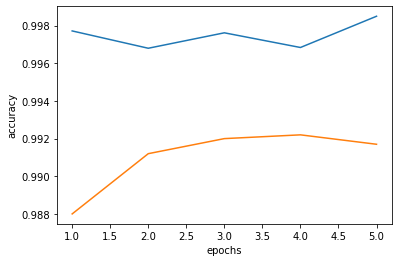

In [60]:
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()